In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
path = "../data/raw/player_raw_data.csv"
df = pd.read_csv(path)
df.head()

,name,country,age,overall,potential,club,best_position,value,wage,Crossing,...,Vision,Penalties,Composure,Defensive Awareness,Standing Tackle,Sliding Tackle,Diving,Handling,Kicking,Reflexes
0,Greg Halford,England,36,59,59,Waterford FC,CB,€40K,€500,53,...,52,61,61,59,61,59,12,16,11,14
1,Santiago Silva,Uruguay,40,71,71,Club Atlético Aldosivi,ST,€0,€7K,52,...,68,74,76,37,39,34,13,11,13,15
2,Sammy Bossut,Belgium,35,69,69,SV Zulte Waregem,GK,€150K,€4K,12,...,49,17,47,22,14,13,67,70,63,68
3,Marcelo Barovero,Argentina,37,70,70,Club Atlético de San Luis,GK,€180K,€5K,14,...,51,20,64,19,16,14,68,66,63,71
4,Enrique Bologna,Argentina,39,72,72,Club Atlético Banfield,GK,€250K,€5K,21,...,53,25,65,12,22,17,74,67,72,74


In [7]:
df.columns

Index(['name', 'country', 'age', 'overall', 'potential', 'club',
       'best_position', 'value', 'wage', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short passing', 'Volleys', 'Dribbling', 'Curve',
       'Fk Accuracy', 'Long Passing', 'Ball Control', 'Acceleration',
       'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power',
       'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Defensive Awareness', 'Standing Tackle', 'Sliding Tackle', 'Diving',
       'Handling', 'Kicking', 'Reflexes'],
      dtype='object')

In [8]:
train_df, test_df = train_test_split(df, test_size=0.20, random_state=123)

In [9]:
numeric_feats = ["age", "overall", "potential", 
                 "Crossing","Finishing", "Heading Accuracy", 
                 "Short passing", "Volleys", "Dribbling", "Curve",
                "Fk Accuracy", "Long Passing", "Ball Control",
                "Acceleration", "Sprint Speed", "Agility", "Reactions",
                "Balance", "Shot Power", "Jumping", "Stamina", "Strength",
                "Long Shots", "Aggression", "Interceptions", "Positioning", "Vision",
                "Penalties", "Composure", "Defensive Awareness", "Standing Tackle",
                "Sliding Tackle",  "Diving", "Handling", "Kicking", "Reflexes"]
categorical_feats = ["country"] # "name"
drop_feats = ["value", "wage", "name"]

In [10]:
len(numeric_feats)

36

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [15]:
preprocessor = make_column_transformer(
    (
        make_pipeline(SimpleImputer(), StandardScaler()),
        numeric_feats,
    ),  # scaling on numeric features
    (
        OneHotEncoder(handle_unknown="ignore", sparse = False),
        categorical_feats,
    ),  # OHE on categorical features
    #("passthrough", passthrough_feats),  # no transformations on the binary features
    ("drop", drop_feats),
)
trans = preprocessor.fit_transform(train_df)


In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [64]:
pca = PCA(n_components=18)
new_trans = pca.fit_transform(trans)

In [65]:
# Define Model
kmeans_model = KMeans(n_clusters=9, random_state=3021)

# Fit into dataset fit
kmeans_predict = kmeans_model.fit_predict(new_trans)

In [66]:
import matplotlib.cm as cm
import numpy as np
x = np.arange(10)
ys = [i+x+(i*x)**2 for i in range(10)]
colors = cm.rainbow(np.linspace(0, 1, len(ys)))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

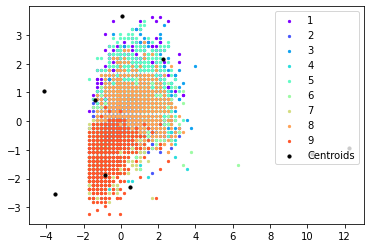

In [70]:
# Visualising the clusters
plt.scatter(trans[kmeans_predict == 0, 0], trans[kmeans_predict == 0, 1], s = 5, c = colors[0], label = "1")
plt.scatter(trans[kmeans_predict == 1, 0], trans[kmeans_predict == 1, 1], s = 5, c = colors[1], label = "2")
plt.scatter(trans[kmeans_predict == 2, 0], trans[kmeans_predict == 2, 1], s = 5, c = colors[2], label = "3")
plt.scatter(trans[kmeans_predict == 3, 0], trans[kmeans_predict == 3, 1], s = 5, c = colors[3], label = "4")
plt.scatter(trans[kmeans_predict == 4, 0], trans[kmeans_predict == 4, 1], s = 5, c = colors[4], label = "5")
plt.scatter(trans[kmeans_predict == 5, 0], trans[kmeans_predict == 5, 1], s = 5, c = colors[5], label = "6")
plt.scatter(trans[kmeans_predict == 6, 0], trans[kmeans_predict == 6, 1], s = 5, c = colors[6], label = "7")
plt.scatter(trans[kmeans_predict == 7, 0], trans[kmeans_predict == 7, 1], s = 5, c = colors[7], label = "8")
plt.scatter(trans[kmeans_predict == 8, 0], trans[kmeans_predict == 8, 1], s = 5, c = colors[8], label = "9")

# Plotting the centroids of the clusters
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:,1], s = 10, c = "black", label = "Centroids")
plt.legend();